In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("shuffled_data_new_with_all_features.csv")
df.head()

,content,isReal,noun_count,adj_count,verb_count,adverb_count,conjunctions,pronoun_count,first_person,second_person,...,family,crime,optimism,violence,love,sadness,emotional,joy,negative_emotion,positive_emotion
0,In the heart of the English countryside stood ...,0,0.332278,0.053797,0.145570,0.012658,0.045886,0.066456,0.000000,0.000000,...,0.003252,0.0,0.006504,0.000000,0.003252,0.003252,0.000000,0.001626,0.001626,0.008130
1,"Evan Dicken,""the day I brought you home from t...",1,0.200238,0.071514,0.158522,0.071514,0.035757,0.168057,0.132300,0.047676,...,0.006211,0.0,0.002484,0.003727,0.006211,0.001242,0.001242,0.001242,0.008696,0.007453
2,Martin had been playing the same computer game...,0,0.154812,0.075314,0.161088,0.062762,0.056485,0.158996,0.000000,0.000000,...,0.000000,0.0,0.004246,0.004246,0.000000,0.002123,0.000000,0.000000,0.008493,0.004246
3,"In the soft embrace of morning light, Michael'...",0,0.234397,0.062413,0.158114,0.024965,0.030513,0.145631,0.000000,0.002774,...,0.000000,0.0,0.004213,0.000000,0.004213,0.005618,0.000000,0.002809,0.001404,0.004213
4,from the nearest drugstore is a shitty time to...,1,0.204062,0.047389,0.153772,0.054159,0.028046,0.176015,0.149903,0.024178,...,0.000000,0.0,0.001013,0.002026,0.000000,0.000000,0.001013,0.002026,0.008105,0.003040


In [2]:
target_df = df['isReal']
input_df = df.drop(columns = ['isReal'])

# Using only complexity features

The complexity features being used in this project are:
1. Average Sentence Length: Average no. of words per sentence
2. Average Complex Words: Ratio of no. of complex words (words with 3 syllables or more) to total no. of words
3. Average syllables per word: Average no. of syllables in each word
4. Gunning Fog Readability Index
5.  Flesch Reading Ease Readability Formula


In [3]:
complexity_features_only = input_df[["avg_sentence_length", "avg_complex_words", "avg_syl_per_word", "gunning_fog_index", "flesch_reading_index"]]
complexity_features_only

,avg_sentence_length,avg_complex_words,avg_syl_per_word,gunning_fog_index,flesch_reading_index
0,20.387097,0.186709,1.648734,15.623193,46.659185
1,16.134615,0.046484,1.280095,8.313203,82.162299
2,10.622222,0.062762,1.322176,6.759349,84.197377
3,16.022222,0.116505,1.475728,11.069083,65.725843
4,9.847619,0.051257,1.289168,5.989338,87.776030
...,...,...,...,...,...
395,13.470588,0.074236,1.355895,8.357668,78.453619
396,17.464286,0.094070,1.470348,10.748495,64.717339
397,10.837838,0.057357,1.256858,6.629399,89.504420
398,34.652174,0.050188,1.281054,15.868398,63.285879


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(complexity_features_only, target_df, test_size = 0.3, stratify=target_df)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

linear_svm_model = SVC(kernel='linear')
linear_svm_model.fit(X_train, y_train)

logistic_regression_predictions = logistic_regression_model.predict(X_test)
linear_svm_predictions = linear_svm_model.predict(X_test)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
linear_svm_accuracy = accuracy_score(y_test, linear_svm_predictions)

print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Linear SVM Accuracy:", linear_svm_accuracy)

Logistic Regression Accuracy: 0.775
Linear SVM Accuracy: 0.775


In [6]:
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_regression_predictions))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.72      0.76        60
           1       0.75      0.83      0.79        60

    accuracy                           0.78       120
   macro avg       0.78      0.78      0.77       120
weighted avg       0.78      0.78      0.77       120



In [7]:
print("Linear SVM Classification Report:\n", classification_report(y_test, linear_svm_predictions))

Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.63      0.74        60
           1       0.71      0.92      0.80        60

    accuracy                           0.78       120
   macro avg       0.80      0.77      0.77       120
weighted avg       0.80      0.78      0.77       120



Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 120/120 [00:03<00:00, 35.41it/s]


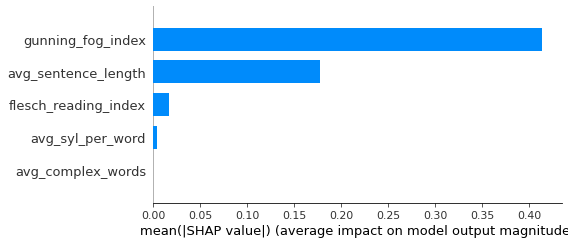

In [8]:
import shap

explainer = shap.KernelExplainer(logistic_regression_model.predict, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


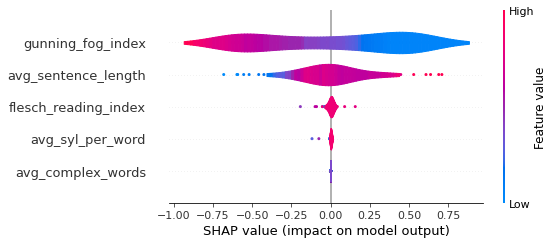

In [9]:
shap.summary_plot(shap_values, X_test, plot_type="violin")

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 120/120 [00:04<00:00, 26.96it/s]


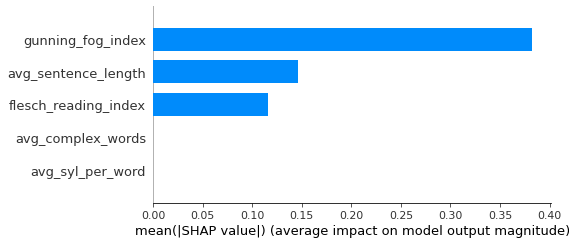

In [10]:
explainer = shap.KernelExplainer(linear_svm_model.predict, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


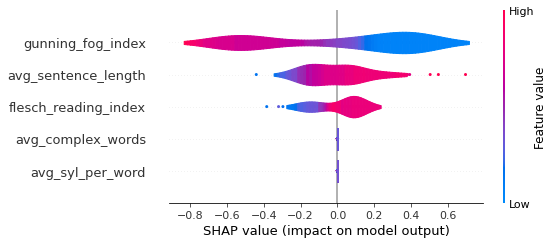

In [11]:
shap.summary_plot(shap_values, X_test, plot_type='violin')

# Using only stylistic features

The stylistic features being used in this project are:
1. Ratio of number of nouns to total no. of words
2. Ratio of number of adjectives to total no. of words
3. Ratio of number of verbs to total no. of words
4. Ratio of no. of adverbs to total no. of words
5. Ratio of no. of conjunctions to total no. of words
6. Ratio of no. of pronouns to total no. of words
7. Ratio of no. of first/second/third person words to total no. of words
8. Ratio of no. of present/past/future tense words to total no. of words
9. Ratio of no. of active/passive words to total no. of words


In [12]:
stylistic_features_only = input_df[["noun_count","adj_count","verb_count", "adverb_count","conjunctions", "pronoun_count","first_person",
"second_person",
"third_person",
"present",
"past",
"future",
"active",
"passive"]]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(stylistic_features_only, target_df, test_size = 0.3, stratify=target_df)

In [14]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

linear_svm_model = SVC(kernel='linear')
linear_svm_model.fit(X_train, y_train)

logistic_regression_predictions = logistic_regression_model.predict(X_test)
linear_svm_predictions = linear_svm_model.predict(X_test)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
linear_svm_accuracy = accuracy_score(y_test, linear_svm_predictions)

print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Linear SVM Accuracy:", linear_svm_accuracy)

Logistic Regression Accuracy: 0.7833333333333333
Linear SVM Accuracy: 0.7666666666666667


In [15]:
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_regression_predictions))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79        60
           1       0.80      0.75      0.78        60

    accuracy                           0.78       120
   macro avg       0.78      0.78      0.78       120
weighted avg       0.78      0.78      0.78       120



In [16]:
print("Linear SVM Classification Report:\n", classification_report(y_test, linear_svm_predictions))

Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79        60
           1       0.83      0.67      0.74        60

    accuracy                           0.77       120
   macro avg       0.78      0.77      0.76       120
weighted avg       0.78      0.77      0.76       120



#### Using stylistic features gives better results as compared to complexity features

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 120/120 [01:32<00:00,  1.29it/s]


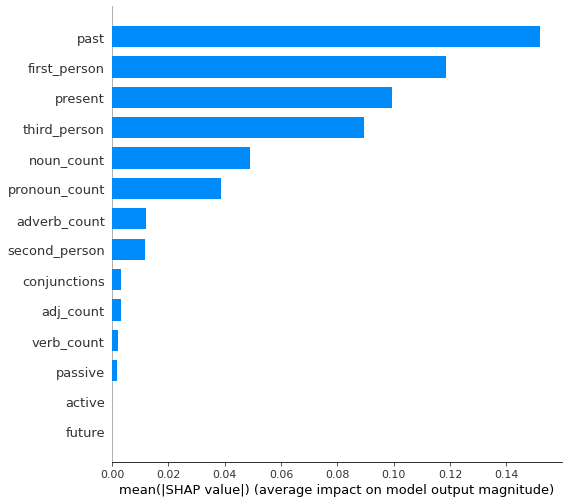

In [17]:
explainer = shap.KernelExplainer(logistic_regression_model.predict, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


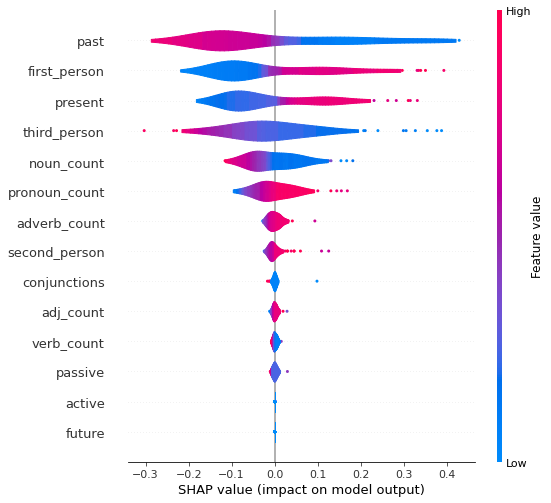

In [18]:
shap.summary_plot(shap_values, X_test, plot_type='violin')

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 120/120 [03:50<00:00,  1.92s/it]


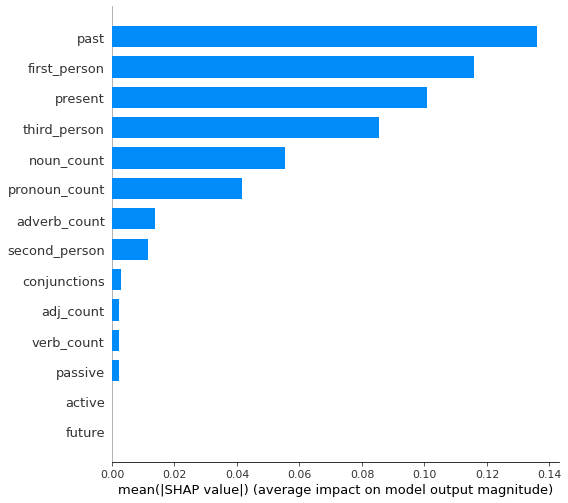

In [19]:
explainer = shap.KernelExplainer(linear_svm_model.predict, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


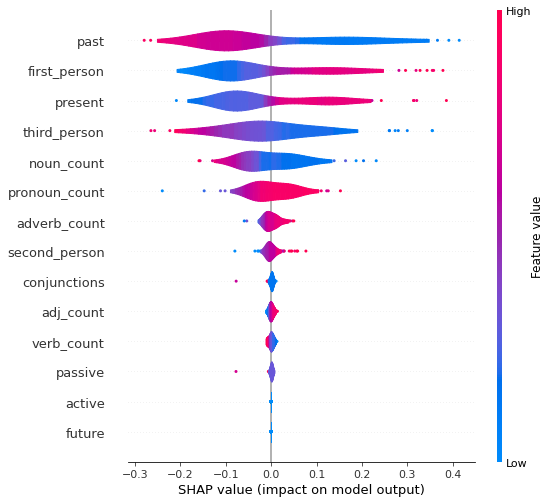

In [20]:
shap.summary_plot(shap_values, X_test, plot_type='violin')

# Using only psychology features

The pyschological features used in this project are:
1. Hate
2. Family
3. Crime
4. Optimism
5. Violence
6. Love
7. Sadness
8. Emotional
9. Joy
10. Negative emotion
11. Positive emotion

In [21]:
lexical_features_only = input_df[['hate', 'family', 'crime', 'optimism', 'violence', 'love', 'sadness', 'emotional', 'joy', 'negative_emotion', 'positive_emotion']
]

In [22]:
lexical_features_only

,hate,family,crime,optimism,violence,love,sadness,emotional,joy,negative_emotion,positive_emotion
0,0.001626,0.003252,0.000000,0.006504,0.000000,0.003252,0.003252,0.000000,0.001626,0.001626,0.008130
1,0.000000,0.006211,0.000000,0.002484,0.003727,0.006211,0.001242,0.001242,0.001242,0.008696,0.007453
2,0.000000,0.000000,0.000000,0.004246,0.004246,0.000000,0.002123,0.000000,0.000000,0.008493,0.004246
3,0.002809,0.000000,0.000000,0.004213,0.000000,0.004213,0.005618,0.000000,0.002809,0.001404,0.004213
4,0.001013,0.000000,0.000000,0.001013,0.002026,0.000000,0.000000,0.001013,0.002026,0.008105,0.003040
...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.000000,0.002222,0.004444,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.002222
396,0.000000,0.000000,0.000000,0.012270,0.002045,0.006135,0.006135,0.000000,0.008180,0.000000,0.018405
397,0.007772,0.000000,0.000000,0.010363,0.012953,0.002591,0.002591,0.007772,0.002591,0.012953,0.012953
398,0.003793,0.000000,0.000000,0.003793,0.001264,0.001264,0.003793,0.001264,0.000000,0.003793,0.001264


In [23]:
X_train, X_test, y_train, y_test = train_test_split(lexical_features_only, target_df, test_size = 0.3, stratify=target_df)

In [24]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

linear_svm_model = SVC(kernel='linear')
linear_svm_model.fit(X_train, y_train)

logistic_regression_predictions = logistic_regression_model.predict(X_test)
linear_svm_predictions = linear_svm_model.predict(X_test)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
linear_svm_accuracy = accuracy_score(y_test, linear_svm_predictions)

print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Linear SVM Accuracy:", linear_svm_accuracy)

Logistic Regression Accuracy: 0.7333333333333333
Linear SVM Accuracy: 0.5666666666666667


In [25]:
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_regression_predictions))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.57      0.68        60
           1       0.68      0.90      0.77        60

    accuracy                           0.73       120
   macro avg       0.76      0.73      0.73       120
weighted avg       0.76      0.73      0.73       120



In [26]:
print("Linear SVM Classification Report:\n", classification_report(y_test, linear_svm_predictions))

Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.13      0.24        60
           1       0.54      1.00      0.70        60

    accuracy                           0.57       120
   macro avg       0.77      0.57      0.47       120
weighted avg       0.77      0.57      0.47       120



Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 120/120 [01:31<00:00,  1.31it/s]


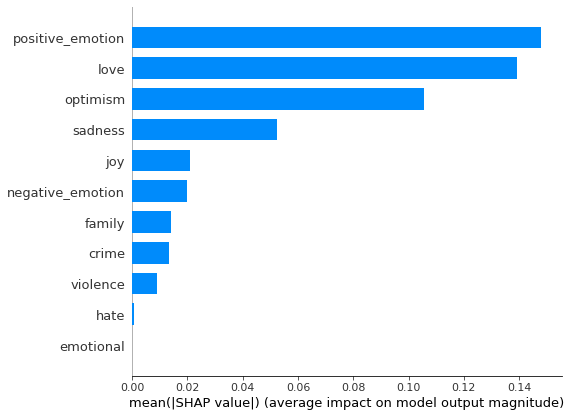

In [27]:
explainer = shap.KernelExplainer(logistic_regression_model.predict, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


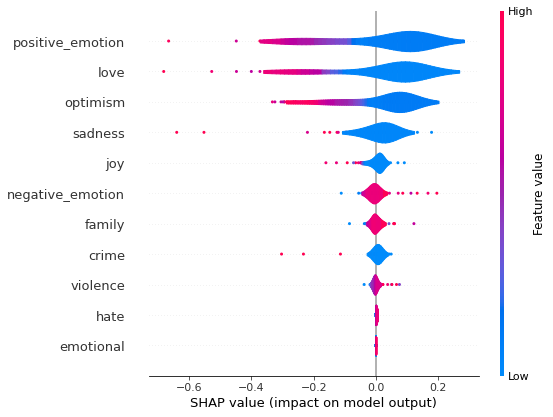

In [28]:
shap.summary_plot(shap_values, X_test, plot_type='violin')

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 120/120 [04:05<00:00,  2.05s/it]


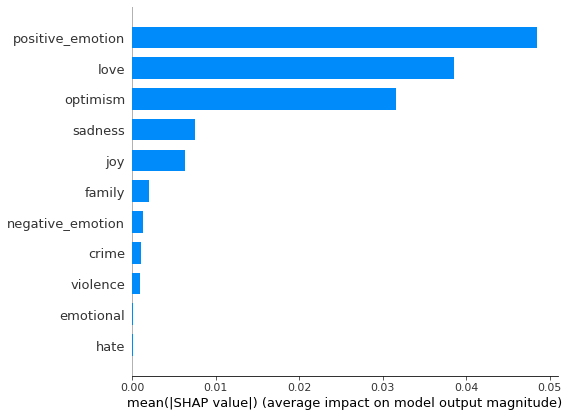

In [29]:
explainer = shap.KernelExplainer(linear_svm_model.predict, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


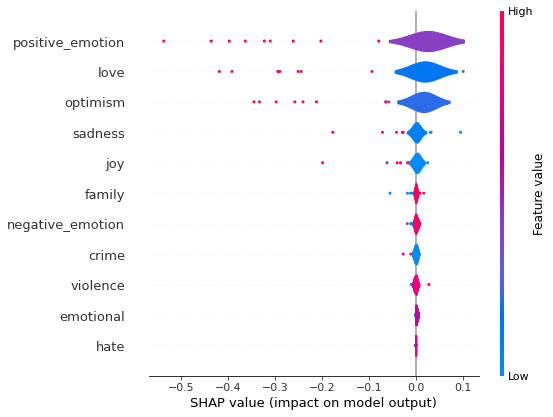

In [30]:
shap.summary_plot(shap_values, X_test, plot_type='violin')

# Using all features

In [31]:
input_df = df.drop(columns = ['content', 'isReal'])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(input_df, target_df, test_size = 0.3, stratify=target_df)

In [33]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

linear_svm_model = SVC(kernel='linear')
linear_svm_model.fit(X_train, y_train)

logistic_regression_predictions = logistic_regression_model.predict(X_test)
linear_svm_predictions = linear_svm_model.predict(X_test)

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
linear_svm_accuracy = accuracy_score(y_test, linear_svm_predictions)

print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Linear SVM Accuracy:", linear_svm_accuracy)

Logistic Regression Accuracy: 0.8333333333333334
Linear SVM Accuracy: 0.875


In [34]:
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_regression_predictions))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        60
           1       0.81      0.87      0.84        60

    accuracy                           0.83       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.83      0.83      0.83       120



In [35]:
print("Linear SVM Classification Report:\n", classification_report(y_test, linear_svm_predictions))

Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        60
           1       0.85      0.92      0.88        60

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.87       120
weighted avg       0.88      0.88      0.87       120



Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 120/120 [01:52<00:00,  1.07it/s]


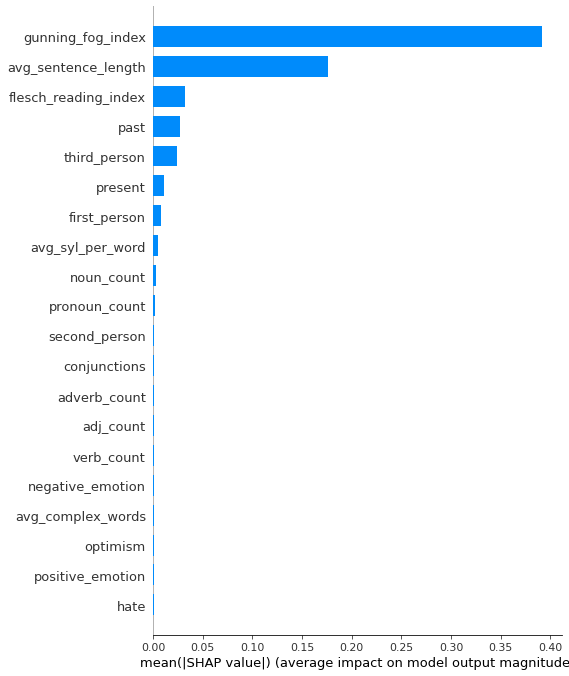

In [36]:
explainer = shap.KernelExplainer(logistic_regression_model.predict, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


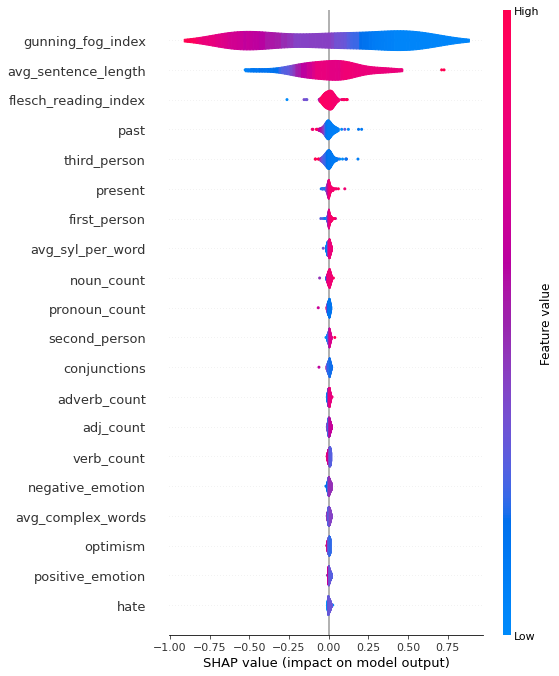

In [37]:
shap.summary_plot(shap_values, X_test, plot_type='violin')

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 120/120 [04:07<00:00,  2.06s/it]


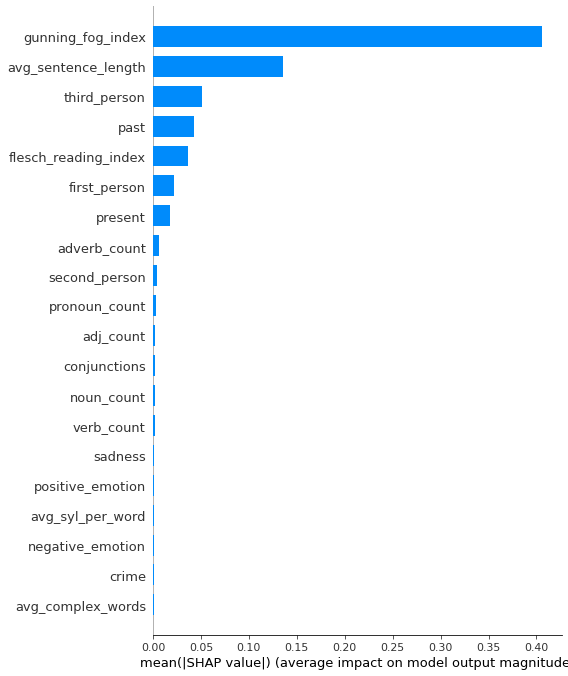

In [38]:
explainer = shap.KernelExplainer(linear_svm_model.predict, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


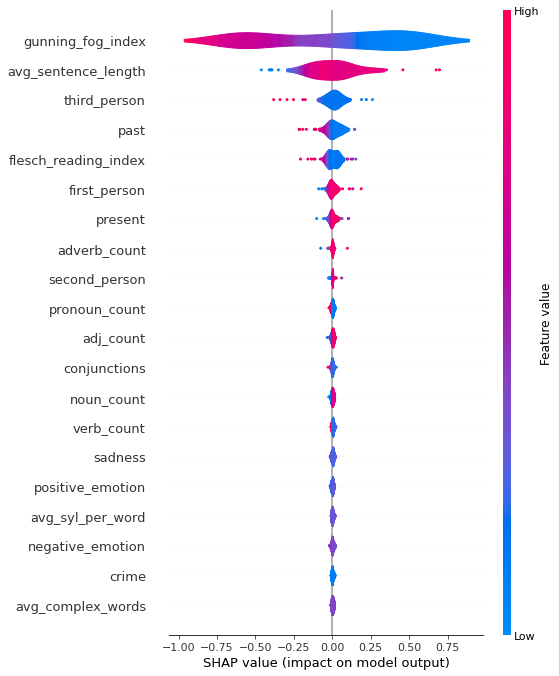

In [39]:
shap.summary_plot(shap_values, X_test, plot_type='violin')